## Group: 8
## Project: Two-Stage Direct Response Model

### Read in data

In [78]:
# import libraries for reading in csv data
import pandas as pd
import random
random.seed(12345)
import datetime
import numpy as np
import seaborn as sns
import sys
import itertools
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, HistGradientBoostingRegressor
import matplotlib.pyplot as plt
import scikitplot as skplt
from interpret.perf import ROC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, SelectFpr, chi2
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import (mean_squared_error, r2_score, accuracy_score, f1_score,
                             roc_auc_score, mean_absolute_error, roc_curve)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("Python version:", sys.version)
NTHREAD = 4
SEED = 12345

Python version: 3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]


In [3]:
# read csv files, store as dataframes
transfile=pd.read_csv('Data/Transfile.csv')
demofile=pd.read_csv('Data/Demofile.csv')
target_file=pd.read_csv('Data/Target1stPrtyfile.csv')

### Studying raw data

In [4]:
transfile.head()

,masterprimaryid,append_animal_welfare,append_animal,append_env,append_humanitarian,append_parks_nature,append_advocacy_political,append_civilrights,append_education,append_religion,...,append_wildlifewarriors,append_fundraisingpartners,append_competitors,append_direct_trans,append_web,append_dollar_life,append_trans_life,append_dollar_0_12M,append_env_enthusiasts,run_date
0,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,1,3,2,9,0,873,87,100,2,19DEC2023
1,0000257D-E8FD-4D5D-A589-EB04519D655F,0,0,5,0,0,0,0,0,0,...,0,0,9,0,1,10010,121,630,5,19DEC2023
2,000026B3-046F-4E71-9C90-9BDEF05882F5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,9836,119,0,0,19DEC2023
3,0000357F-B1E3-4A2E-9736-345D032DA73E,1,3,47,1,7,0,0,0,4,...,5,28,68,51,0,43947,821,2871,13,19DEC2023
4,00004DFC-048B-41B2-B7BC-723FB3383150,0,0,7,0,0,0,0,0,0,...,0,0,13,7,3,24196,211,1512,4,19DEC2023


In [5]:
demofile.head()

,masterprimaryid,append_NetWorth,append_HomeValue,append_age,append_age_indicator,append_WealthResources,append_HouseHoldEducation,append_enviroconquintile,append_FamilyComp,append_MaritalStatus,append_mt_OnlineInsuranceBuyer,append_mt_CultureArtsEvents,append_mt_HighDollarDonor,append_mt_LowDollarDonor,birth_year,append_ethnicity,append_ethnicitygrp,run_date
0,000004E1-D14E-42AB-A384-40A2773F507C,0,430.0,46.0,H,2,4,NaN,14.0,NaN,71.0,16.0,70.0,29.0,1977.0,Thai,Far Eastern,20DEC2023
1,0000257D-E8FD-4D5D-A589-EB04519D655F,10,500.0,52.0,S,10,4,NaN,2.0,NaN,21.0,18.0,4.0,39.0,1971.0,Italian,Mediterranean,20DEC2023
2,000026B3-046F-4E71-9C90-9BDEF05882F5,4,241.0,84.0,S,3,4,NaN,14.0,NaN,16.0,27.0,59.0,15.0,1939.0,English,Western European,20DEC2023
3,0000357F-B1E3-4A2E-9736-345D032DA73E,9,186.0,87.0,S,8,5,NaN,12.0,NaN,62.0,15.0,3.0,25.0,1936.0,English,Western European,20DEC2023
4,00004DFC-048B-41B2-B7BC-723FB3383150,9,685.0,38.0,A,8,5,NaN,11.0,NaN,85.0,15.0,20.0,12.0,1985.0,NaN,NaN,20DEC2023


In [6]:
target_file.head()

,PrimaryKey,masterprimaryid,TGTresp,TGTgiftamt,LifeCycle,LifeCycleDetail,GivingYears,cumul_amount,first_gift_amount,first_gift_channel,...,HPG_channel,MRG_amount,MRG_channel,Prior_Channel_Behavior,Monthsback,donor_status,Monthly_Donor,avg_gift_amt,YE_Behavior,Gift_Behavior
0,000004E1-D14E-42AB-A384-40A2773F507C|AHOMA2010...,000004E1-D14E-42AB-A384-40A2773F507C,0,0.0,Lapsed,Lapsed 13-24 Mos,1,$10.00,$10.00,Offline,...,Offline,$10.00,Offline,No Prior Giving,13,25 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
1,000004E1-D14E-42AB-A384-40A2773F507C|AHOMA2010...,000004E1-D14E-42AB-A384-40A2773F507C,0,0.0,Lapsed,Lapsed 13-24 Mos,1,$10.00,$10.00,Offline,...,Offline,$10.00,Offline,No Prior Giving,13,25 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
2,000004E1-D14E-42AB-A384-40A2773F507C|AILMA2011...,000004E1-D14E-42AB-A384-40A2773F507C,0,0.0,Lapsed,Lapsed 13-24 Mos,1,$10.00,$10.00,Offline,...,Offline,$10.00,Offline,No Prior Giving,14,25 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
3,000004E1-D14E-42AB-A384-40A2773F507C|AILMA2111...,000004E1-D14E-42AB-A384-40A2773F507C,0,0.0,Lapsed,Lapsed 25-36 Mos,1,$10.00,$10.00,Offline,...,Offline,$10.00,Offline,No Prior Giving,27,36 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
4,0000257D-E8FD-4D5D-A589-EB04519D655F|AGAMA2011...,0000257D-E8FD-4D5D-A589-EB04519D655F,0,0.0,Consecutive Givers,Consecutive 5+ Years,19,"$2,760.00",$30.00,Offline,...,Offline,$20.00,Offline,Offline Only,1,less than 12months,Y,20.597015,A: Both YE and Non YE,A: All


In [7]:
trans_ct = transfile.count()
demo_ct = demofile.count()
target_ct = target_file.count()

print(f'num rows in transfile: {trans_ct}\nnum rows in demofile: {demo_ct}\nnum rows in target_file: {target_ct}')

num rows in transfile: masterprimaryid               1006110
append_animal_welfare         1006110
append_animal                 1006110
append_env                    1006110
append_humanitarian           1006110
append_parks_nature           1006110
append_advocacy_political     1006110
append_civilrights            1006110
append_education              1006110
append_religion               1006110
append_medsvcs_supp           1006110
append_cure                   1006110
append_spaces                 1006110
append_guardian_angles        1006110
append_wildlifewarriors       1006110
append_fundraisingpartners    1006110
append_competitors            1006110
append_direct_trans           1006110
append_web                    1006110
append_dollar_life            1006110
append_trans_life             1006110
append_dollar_0_12M           1006110
append_env_enthusiasts        1006110
run_date                      1006110
dtype: int64
num rows in demofile: masterprimaryid               

### Join all files for one dataset

In [8]:
# inner join on all three csv files using masterprimaryid
all_fields = transfile.merge(demofile, how='inner', on='masterprimaryid').merge(target_file, how='inner', on='masterprimaryid')
all_fields.head()

,masterprimaryid,append_animal_welfare,append_animal,append_env,append_humanitarian,append_parks_nature,append_advocacy_political,append_civilrights,append_education,append_religion,...,HPG_channel,MRG_amount,MRG_channel,Prior_Channel_Behavior,Monthsback,donor_status,Monthly_Donor,avg_gift_amt,YE_Behavior,Gift_Behavior
0,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,Offline,$10.00,Offline,No Prior Giving,13,25 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
1,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,Offline,$10.00,Offline,No Prior Giving,13,25 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
2,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,Offline,$10.00,Offline,No Prior Giving,14,25 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
3,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,Offline,$10.00,Offline,No Prior Giving,27,36 Months lapsed,N,10.000000,C: Non YE Only,D: Others Only
4,0000257D-E8FD-4D5D-A589-EB04519D655F,0,0,5,0,0,0,0,0,0,...,Offline,$20.00,Offline,Offline Only,1,less than 12months,Y,20.597015,A: Both YE and Non YE,A: All


In [9]:
# viewing size, column names, and column types of all_fields
all_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276648 entries, 0 to 3276647
Data columns (total 62 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   masterprimaryid                 object 
 1   append_animal_welfare           int64  
 2   append_animal                   int64  
 3   append_env                      int64  
 4   append_humanitarian             int64  
 5   append_parks_nature             int64  
 6   append_advocacy_political       int64  
 7   append_civilrights              int64  
 8   append_education                int64  
 9   append_religion                 int64  
 10  append_medsvcs_supp             int64  
 11  append_cure                     int64  
 12  append_spaces                   int64  
 13  append_guardian_angles          int64  
 14  append_wildlifewarriors         int64  
 15  append_fundraisingpartners      int64  
 16  append_competitors              int64  
 17  append_direct_trans        

### Handling non-numeric x variables

In [10]:
# function for creating dummies for categorical variables
def create_dummies(x, all_fields):
    temp_df = pd.get_dummies(all_fields[x], prefix=x, dtype=int)
    all_fields = pd.concat([all_fields, temp_df], axis=1)
    return all_fields

categorical_vars = ['Monthly_Donor', 'donor_status', 'YE_Behavior', 'Gift_Behavior', 'Prior_Channel_Behavior', 'MRG_channel', 'HPG_channel',
                     'LifeCycle', 'LifeCycleDetail', 'first_gift_channel', 'append_FamilyComp']

for x in categorical_vars:
    all_fields = create_dummies(x, all_fields)

In [11]:
# dropping columns which were converted to dummies, plus a few we don't intend to use
all_fields = all_fields.drop(columns=['append_ethnicitygrp', 'append_ethnicity', 'first_gift_channel', 'LifeCycleDetail', 'LifeCycle',
                                     'HPG_channel', 'MRG_channel', 'Prior_Channel_Behavior', 'Gift_Behavior', 'YE_Behavior', 'donor_status',
                                     'Monthly_Donor', 'append_MaritalStatus', 'append_spaces', 'append_FamilyComp'])

In [12]:
# converting currency strings to float type
# ignore warning
all_fields['HPG_amount'] = all_fields['HPG_amount'].str.replace('$', '').str.replace(',', '').astype('float')
all_fields['MRG_amount'] = all_fields['MRG_amount'].str.replace('$', '').str.replace(',', '').astype('float')
all_fields['cumul_amount'] = all_fields['cumul_amount'].str.replace('$', '').str.replace(',', '').astype('float')
all_fields['first_gift_amount'] = all_fields['first_gift_amount'].str.replace('$', '').str.replace(',', '').astype('float')

In [13]:
# checking in on what our data looks like now
all_fields.head()

,masterprimaryid,append_animal_welfare,append_animal,append_env,append_humanitarian,append_parks_nature,append_advocacy_political,append_civilrights,append_education,append_religion,...,append_FamilyComp_7.0,append_FamilyComp_8.0,append_FamilyComp_9.0,append_FamilyComp_10.0,append_FamilyComp_11.0,append_FamilyComp_12.0,append_FamilyComp_13.0,append_FamilyComp_14.0,append_FamilyComp_15.0,append_FamilyComp_16.0
0,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,000004E1-D14E-42AB-A384-40A2773F507C,0,0,62,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0000257D-E8FD-4D5D-A589-EB04519D655F,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
all_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276648 entries, 0 to 3276647
Columns: 108 entries, masterprimaryid to append_FamilyComp_16.0
dtypes: float64(14), int64(89), object(5)
memory usage: 2.6+ GB


### Missing Values

In [15]:
missing_values_count = all_fields.isnull().sum()

In [16]:
print(missing_values_count)

masterprimaryid           0
append_animal_welfare     0
append_animal             0
append_env                0
append_humanitarian       0
                         ..
append_FamilyComp_12.0    0
append_FamilyComp_13.0    0
append_FamilyComp_14.0    0
append_FamilyComp_15.0    0
append_FamilyComp_16.0    0
Length: 108, dtype: int64


In [17]:
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

masterprimaryid: 0
append_animal_welfare: 0
append_animal: 0
append_env: 0
append_humanitarian: 0
append_parks_nature: 0
append_advocacy_political: 0
append_civilrights: 0
append_education: 0
append_religion: 0
append_medsvcs_supp: 0
append_cure: 0
append_guardian_angles: 0
append_wildlifewarriors: 0
append_fundraisingpartners: 0
append_competitors: 0
append_direct_trans: 0
append_web: 0
append_dollar_life: 0
append_trans_life: 0
append_dollar_0_12M: 0
append_env_enthusiasts: 0
run_date_x: 0
append_NetWorth: 0
append_HomeValue: 2
append_age: 23215
append_age_indicator: 23215
append_WealthResources: 0
append_HouseHoldEducation: 0
append_enviroconquintile: 3276183
append_mt_OnlineInsuranceBuyer: 68778
append_mt_CultureArtsEvents: 68778
append_mt_HighDollarDonor: 68778
append_mt_LowDollarDonor: 68778
birth_year: 23215
run_date_y: 0
PrimaryKey: 0
TGTresp: 0
TGTgiftamt: 0
GivingYears: 0
cumul_amount: 0
first_gift_amount: 0
gift_count: 0
HPG_amount: 0
MRG_amount: 0
Monthsback: 0
avg_gift_amt

In [18]:
# let's apply the mean to missing values for the following columns:
    # append_mt_OnlineInsuranceBuyer
    # append_mt_CultureArtsEvents
    # append_mt_HighDollarDonor
    # append_mt_LowDollarDonor

columns_to_fill = [
    'append_mt_OnlineInsuranceBuyer',
    'append_mt_CultureArtsEvents',
    'append_mt_HighDollarDonor',
    'append_mt_LowDollarDonor'
]
# using the mean of each column to fill that column's nulls
for column in columns_to_fill:
        all_fields[column].fillna(all_fields[column].mean(), inplace=True)

In [19]:
# drop append_enviroconquintile
all_fields.drop('append_enviroconquintile', axis=1, inplace=True)

In [20]:
# Delete rows with missing values in the append_HomeValue column
all_fields.dropna(subset=['append_HomeValue'], inplace=True)

In [21]:
# aplly mean to missing values of age
mean_append_age = all_fields['append_age'].mean()
all_fields['append_age'].fillna(mean_append_age, inplace=True)

### Target Variables

In [22]:
all_fields['TGTgiftamt'].mean()

0.884472469714458

In [23]:
respGroups = all_fields.groupby(['TGTresp']).count()
respGroups

,masterprimaryid,append_animal_welfare,append_animal,append_env,append_humanitarian,append_parks_nature,append_advocacy_political,append_civilrights,append_education,append_religion,...,append_FamilyComp_7.0,append_FamilyComp_8.0,append_FamilyComp_9.0,append_FamilyComp_10.0,append_FamilyComp_11.0,append_FamilyComp_12.0,append_FamilyComp_13.0,append_FamilyComp_14.0,append_FamilyComp_15.0,append_FamilyComp_16.0
TGTresp,,,,,,,,,,,,,,,,,,,,,
0,3191715,3191715,3191715,3191715,3191715,3191715,3191715,3191715,3191715,3191715,...,3191715,3191715,3191715,3191715,3191715,3191715,3191715,3191715,3191715,3191715
1,84931,84931,84931,84931,84931,84931,84931,84931,84931,84931,...,84931,84931,84931,84931,84931,84931,84931,84931,84931,84931


### Load Data

In [24]:
data = all_fields.sort_values(by='TGTresp', ascending=True)

In [25]:
x_names_df = data
# dropping some more x values we are not considering for model use
x_names_df = x_names_df.drop(columns=['PrimaryKey', 'TGTresp', 'TGTgiftamt', 'run_date_y', 'run_date_x', 'append_age_indicator', 'birth_year'])
x_names_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3276646 entries, 0 to 1616836
Data columns (total 100 columns):
 #   Column                                            Dtype  
---  ------                                            -----  
 0   masterprimaryid                                   object 
 1   append_animal_welfare                             int64  
 2   append_animal                                     int64  
 3   append_env                                        int64  
 4   append_humanitarian                               int64  
 5   append_parks_nature                               int64  
 6   append_advocacy_political                         int64  
 7   append_civilrights                                int64  
 8   append_education                                  int64  
 9   append_religion                                   int64  
 10  append_medsvcs_supp                               int64  
 11  append_cure                                       int64  
 12  appe

In [26]:
SEED = 12345
np.random.seed(SEED) # preserve exact reproducibility for this cell

split_ratio = 0.7 # 70%/30% train/test split

# execute split
split = np.random.rand(len(data)) < split_ratio
train = data[split]
valid = data[~split]

# summarize split
print('Train data rows = %d, columns = %d' % (train.shape[0], train.shape[1]))
print('Validation data rows = %d, columns = %d' % (valid.shape[0], valid.shape[1]))


Train data rows = 2293543, columns = 107
Validation data rows = 983103, columns = 107


In [27]:
# for now (before completing model feature selection) we are loading data with all of the x values we are still considering
y_name = 'TGTresp'
x_names = x_names_df.columns.tolist()
# train = train_temp.drop_duplicates(subset='masterprimaryid', keep='last')

In [28]:
respGroups = train.groupby(['TGTresp']).count()
respGroups

,masterprimaryid,append_animal_welfare,append_animal,append_env,append_humanitarian,append_parks_nature,append_advocacy_political,append_civilrights,append_education,append_religion,...,append_FamilyComp_7.0,append_FamilyComp_8.0,append_FamilyComp_9.0,append_FamilyComp_10.0,append_FamilyComp_11.0,append_FamilyComp_12.0,append_FamilyComp_13.0,append_FamilyComp_14.0,append_FamilyComp_15.0,append_FamilyComp_16.0
TGTresp,,,,,,,,,,,,,,,,,,,,,
0,2234049,2234049,2234049,2234049,2234049,2234049,2234049,2234049,2234049,2234049,...,2234049,2234049,2234049,2234049,2234049,2234049,2234049,2234049,2234049,2234049
1,59494,59494,59494,59494,59494,59494,59494,59494,59494,59494,...,59494,59494,59494,59494,59494,59494,59494,59494,59494,59494


In [29]:
# undersampling TGTresp=0 rows for phase 1 training data
respGroupsTrain = train.groupby(['TGTresp'])
n_remove_train = round(respGroupsTrain.get_group(0)['masterprimaryid'].count()*.5)

In [30]:
train_non = respGroupsTrain.get_group(0)
train_non.drop(list(train_non.head(n=n_remove_train).index), axis=0, inplace=True)
train = respGroupsTrain.get_group(1)
train = pd.concat([train, train_non])
# summarize split
print('Train data rows = %d, columns = %d' % (train.shape[0], train.shape[1]))
print('Validation data rows = %d, columns = %d' % (valid.shape[0], valid.shape[1]))

/var/folders/c_/dnmqqpp91870721ms16251300000gn/T/ipykernel_78111/1425196028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_non.drop(list(train_non.head(n=n_remove_train).index), axis=0, inplace=True)


Train data rows = 1176519, columns = 107
Validation data rows = 983103, columns = 107


In [31]:
# preparing phase 2 training data
respGroupsTrain = train.groupby(['TGTresp'])
respGroupsTest = valid.groupby(['TGTresp'])

In [32]:
# training data filtered to include only responder data for phase 2
train_responders = respGroupsTrain.get_group(1)

In [33]:
# test data filtered to undersample TGTresp=0 rows for phase 2
respGroups = valid.groupby(['TGTresp'])
test_responders = respGroupsTest.get_group(1)

In [34]:
print('Train data rows phase 2 = %d, columns = %d' % (train_responders.shape[0], train_responders.shape[1]))
print('Validation data rows phase 2 = %d, columns = %d' % (test_responders.shape[0], test_responders.shape[1]))

Train data rows phase 2 = 59494, columns = 107
Validation data rows phase 2 = 25437, columns = 107


In [35]:
def model_grid(train, valid, x_names, y_name, model_type, model_params=None, n_models=None, seed=None):
    
    """ Performs a random grid search over n_models and model_params.

    :param train_x: X training data as Pandas DataFrame.
    :param train_y: Y training data as Pandas DataFrame.
    :param test_x: X validation data as Pandas DataFrame.
    :param test_y: Y validation data as Pandas DataFrame.
    :param gs_params: Dictionary of lists of potential EBM parameters over which to search.   
    :param n_models: Number of random models to evaluate.
    :param early_stop_thres: GAMI-NET early stopping threshold.
    :param random_state: Random seed for better interpretability.
    :return: Best candidate model from random grid search.

    """

    # cartesian product of gs_params
    keys, values = zip(*model_params.items())
    experiments = [dict(zip(keys, v)) for v in itertools.product(*values)]

    # preserve exact reproducibility for this function
    np.random.seed(SEED) 
    
    # select randomly from cartesian product space
    selected_experiments = np.random.choice(len(experiments), n_models)

    # set global params for seed, etc.
    params = {'random_state': SEED}

    # init grid search loop
    best_candidate = None
    best_score = 0
    best_mse = 4000

    # grid search loop
    #exp = Experiment()
    for i, exper in enumerate(selected_experiments):

        params.update(experiments[exper])  # override global params with current grid run params

        print('Grid search run %d/%d:' % (int(i + 1), int(n_models)))
        print('Training with parameters:', params)
        
        # train 
        current_model = model_type(**params)
        print(current_model)
        candidate = current_model.fit(train[x_names], train[y_name])
        
        # calculate AUC for classification models:
        if model_type in [RandomForestClassifier]:
            #perf = ROC(current_model.predict_proba).explain_perf(valid[x_names], valid[y_name])
            perf = f1_score(valid[y_name], current_model.predict(valid[x_names]))
            #candidate_best_score = perf._internal_obj['overall']['auc']
            candidate_best_score = perf

            # determine if current model is better than previous best
            if candidate_best_score > best_score:
                best_candidate = candidate
                best_score = candidate_best_score
                print('Grid search new best score discovered at iteration %d/%d: %.4f.' %
                                 (int(i + 1), int(n_models), candidate_best_score))
    
            print('---------- ----------')

        else:
            regr_trans = TransformedTargetRegressor(regressor=current_model, transformer=QuantileTransformer(output_distribution='normal'))
            regr_trans.fit(train[x_names], train[y_name])
            ypred = regr_trans.predict(valid[x_names])
            ypred = ypred.astype(float)
            mse_pred = round(mean_squared_error(valid[y_name], ypred),3)
            # determine if current model is better than previous best
            if mse_pred < best_mse:
                best_candidate = candidate
                best_mse = mse_pred
                print('Grid search new best mse discovered at iteration %d/%d: %.4f.' %
                                 (int(i + 1), int(n_models), mse_pred))
    
            print('---------- ----------')
        
        del current_model
            
    return best_candidate

### Phase 1 Feature Selection

In [36]:
feature_sel = x_names
feature_sel.remove('masterprimaryid')

In [37]:
treekbest = make_pipeline(SelectKBest(score_func=chi2, k=25), RandomForestClassifier(random_state=12345, n_jobs=10))
treekbest.fit(train[feature_sel], train[y_name])

Pipeline(steps=[('selectkbest',
                 SelectKBest(k=25, score_func=<function chi2 at 0x15321b880>)),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=10, random_state=12345))])

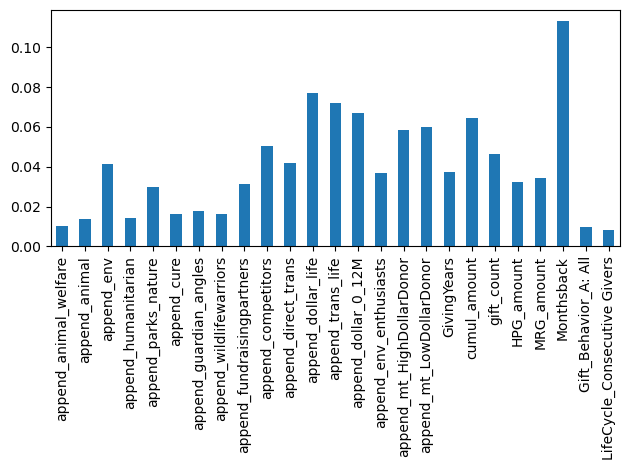

In [38]:
index_features = treekbest[:-1].get_feature_names_out()
pd.Series(treekbest[-1].feature_importances_, index=index_features).plot.bar()
plt.tight_layout()

In [39]:
treekbest[:-1].get_feature_names_out()

array(['append_animal_welfare', 'append_animal', 'append_env',
       'append_humanitarian', 'append_parks_nature', 'append_cure',
       'append_guardian_angles', 'append_wildlifewarriors',
       'append_fundraisingpartners', 'append_competitors',
       'append_direct_trans', 'append_dollar_life', 'append_trans_life',
       'append_dollar_0_12M', 'append_env_enthusiasts',
       'append_mt_HighDollarDonor', 'append_mt_LowDollarDonor',
       'GivingYears', 'cumul_amount', 'gift_count', 'HPG_amount',
       'MRG_amount', 'Monthsback', 'Gift_Behavior_A: All',
       'LifeCycle_Consecutive Givers'], dtype=object)

## Phase 1 Models

In [40]:
# final selected features
# based on combination of selectKbest feature selection
x_names = ['append_animal_welfare', 'append_animal', 'append_env',
       'append_humanitarian', 'append_parks_nature', 'append_cure',
       'append_guardian_angles', 'append_wildlifewarriors',
       'append_fundraisingpartners', 'append_competitors',
       'append_direct_trans', 'append_dollar_life', 'append_trans_life',
       'append_dollar_0_12M', 'append_env_enthusiasts',
       'append_mt_HighDollarDonor', 'append_mt_LowDollarDonor',
       'GivingYears', 'cumul_amount', 'gift_count', 'HPG_amount',
       'MRG_amount', 'Monthsback', 'Gift_Behavior_A: All',
       'LifeCycle_Consecutive Givers']

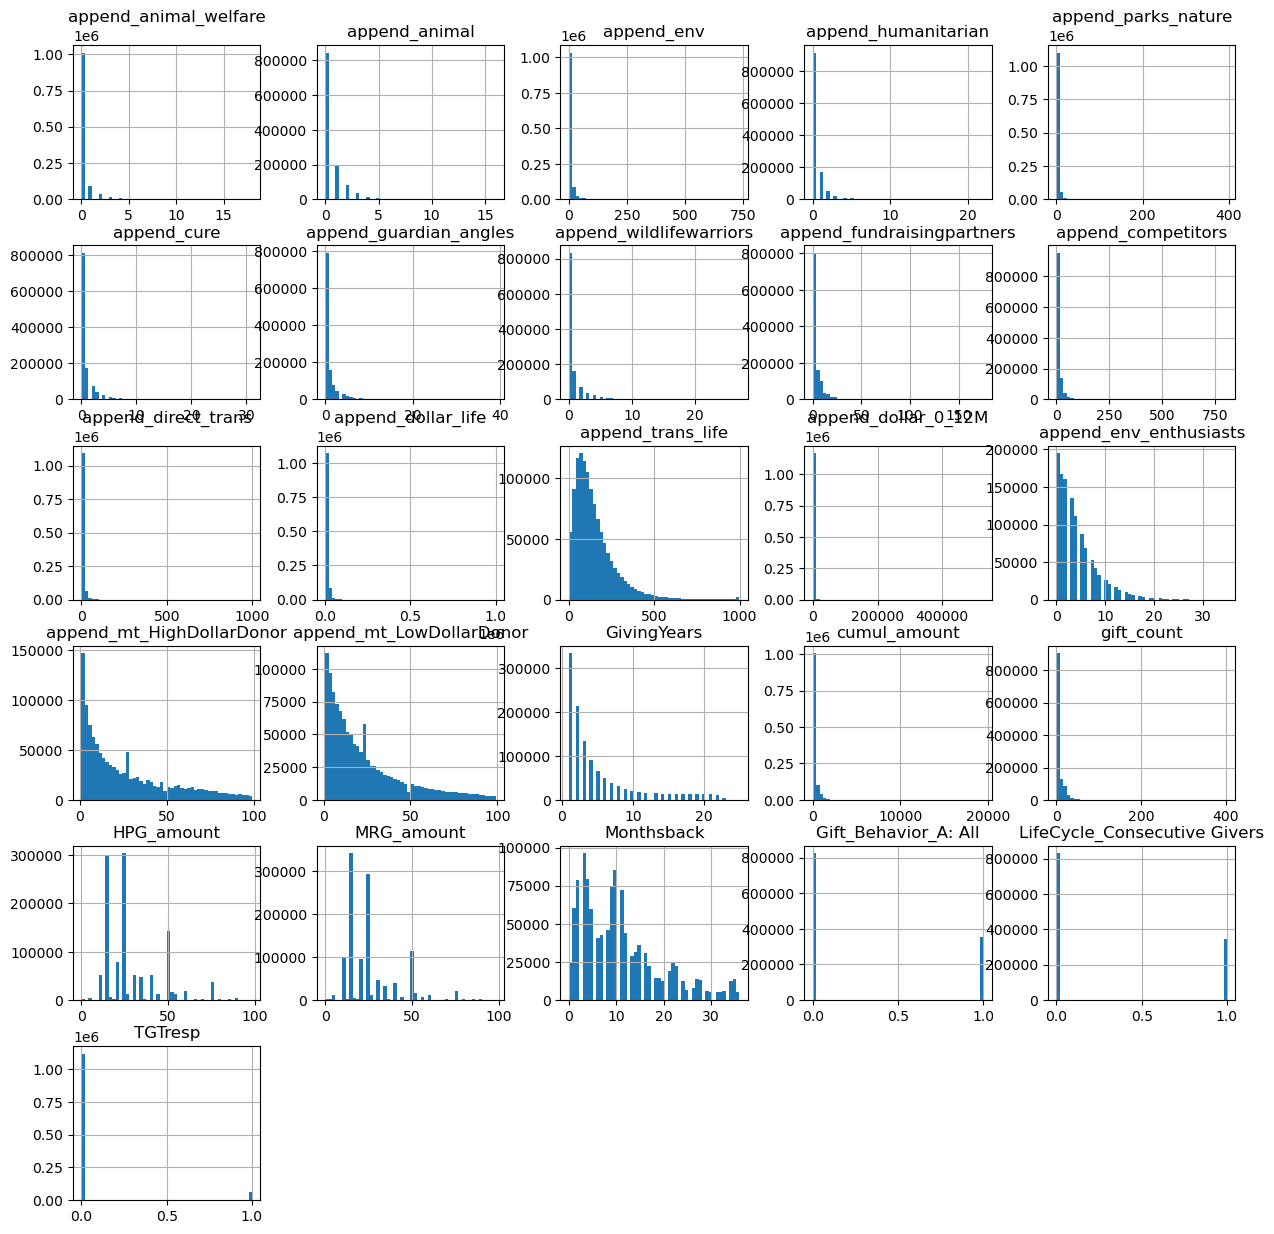

In [41]:
_ = train[x_names + ['TGTresp']].hist(bins=50, figsize=(15, 15))

In [ ]:
# dictionary of hyperparameter value lists for grid search

'''model_params = {'class_weight':[{0: 1, 1: 16},{0: 1, 1: 17},{0: 1, 1: 18},{0: 1, 1: 19},{0: 1, 1: 20},{0: 1, 1: 15},{0: 1, 1: 14},{0: 1, 1: 21}]}

# Decision Tree Classifier grid search
best_model = model_grid(train, valid, x_names, y_name, RandomForestClassifier, model_params=model_params, n_models=20, 
                    seed=SEED)'''

In [43]:
# train phase 1 model
rftree = RandomForestClassifier(class_weight={0: 1.0, 1: 3.0}, max_depth=16,
                       min_samples_leaf=19, n_estimators=110, 
                       random_state=12345, n_jobs=10).fit(train[x_names], train[y_name])


In [44]:
# training AUC
train_auc = roc_auc_score(train[y_name], rftree.predict_proba(train[x_names])[:, 1])
print(f'Training AUC: {train_auc}')

Training AUC: 0.8505956005258425


In [45]:
# probabiliy predictions for training data in classification tree model
rftree_train_probs=rftree.predict_proba(train[x_names])
rftree_train_pred = rftree.predict(train[x_names])

In [46]:
# training f1
train_f1 = f1_score(train['TGTresp'], rftree_train_pred)
print(f'Training F1 score: {train_f1}')

Training F1 score: 0.13334953742385341


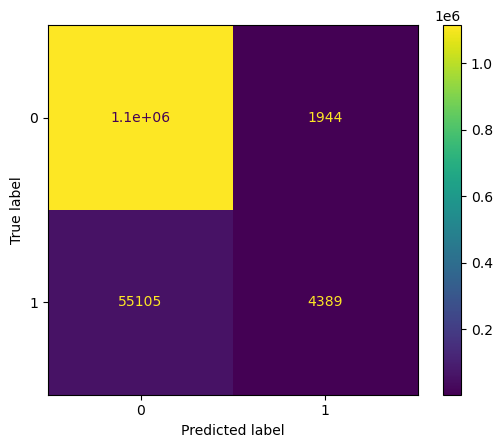

In [47]:
# confusion matrix
cm = confusion_matrix(train['TGTresp'], rftree_train_pred, labels=rftree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rftree.classes_)
disp.plot()
plt.show()

In [48]:
# above we see that we have a high number of false negatives. we are leaning more into being conservative with false
# positives, in order to limit the number of non-donors we rank highly

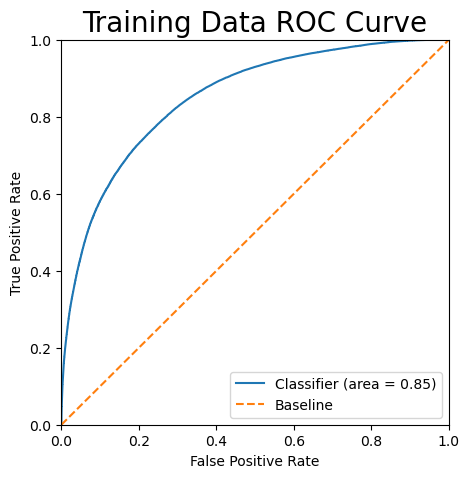

In [49]:
fpr, tpr, thresholds = roc_curve(train['TGTresp'], rftree_train_probs[:,1])

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % train_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Baseline', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Training Data ROC Curve',fontsize = "20")
plt.legend(loc="lower right")
plt.show()

In [50]:
# test AUC
final_auc = roc_auc_score(valid[y_name], rftree.predict_proba(valid[x_names])[:, 1])
print(f'Test AUC: {final_auc}')

Test AUC: 0.7475551028053063


In [51]:
# probabiliy predictions for validation data in classification tree model
rftree_probs=rftree.predict_proba(valid[x_names])
rftree_pred = rftree.predict(valid[x_names])

<BarContainer object of 25 artists>

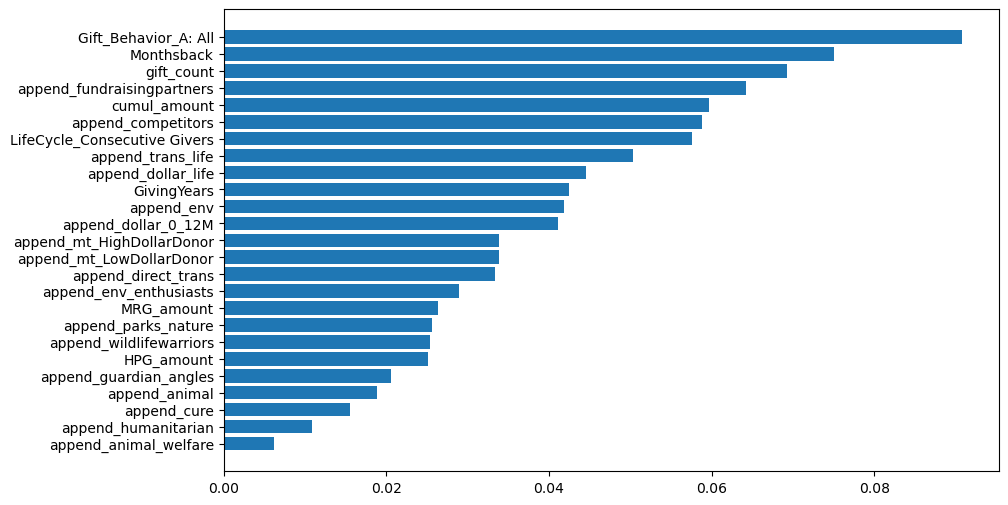

In [52]:
# feature importance for classification tree model
plt.figure(figsize=(10,6))
fi_df = pd.DataFrame()
fi_df['feature_importance'] = rftree.feature_importances_
fi_df['feature'] = rftree.feature_names_in_
fi_df.sort_values(by='feature_importance', inplace=True)
plt.barh('feature', 'feature_importance', data=fi_df)

### Phase 1 Model Results

In [53]:
# dataframe for logistic regression test data predictions
result1 = pd.DataFrame(valid[['masterprimaryid', y_name]])
result1['pred'] = rftree_probs[:,1]
result1['TGT_pred'] = rftree_pred

In [54]:
final_f1 = f1_score(result1[y_name], result1['TGT_pred'])
print(f'Test F1 score: {final_f1}')

Test F1 score: 0.07552466705467493


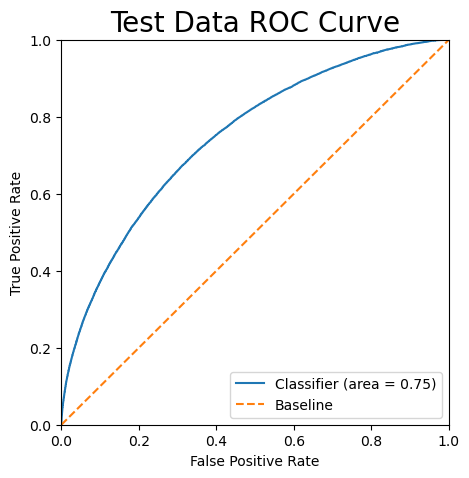

In [55]:
fpr, tpr, thresholds = roc_curve(result1['TGTresp'], result1['pred'])

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % final_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Baseline', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Test Data ROC Curve',fontsize = "20")
plt.legend(loc="lower right")
plt.show()

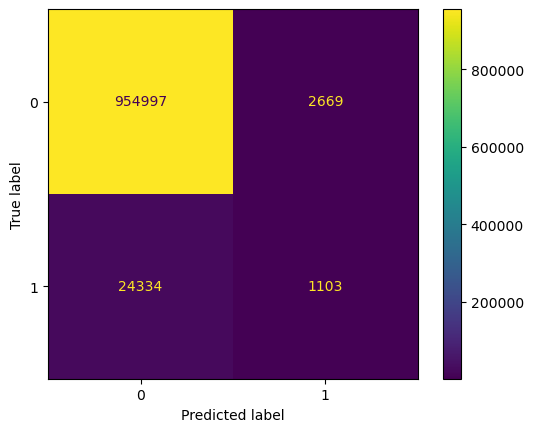

In [56]:
cm = confusion_matrix(result1[y_name], result1['TGT_pred'], labels=rftree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rftree.classes_)
disp.plot()
plt.show()

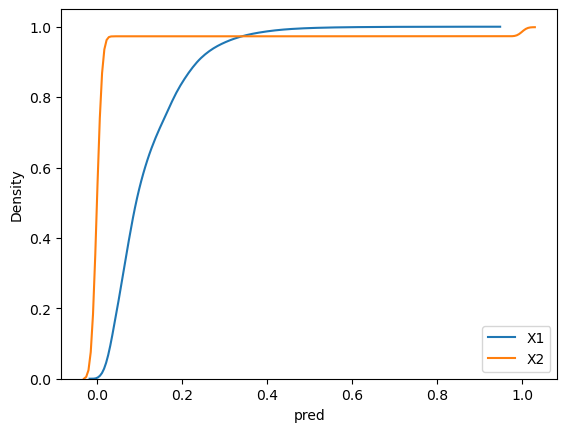

In [57]:
X1 = result1.pred
X2 = result1.TGTresp
sns.kdeplot(data = X1, cumulative = True, label = "X1")
sns.kdeplot(data = X2, cumulative = True, label = "X2")
plt.legend()
plt.show()

### Phase 2 Feature Selection

In [58]:
# viewing average gift amount in training data (without TGTresp = 0 rows)
avg_tgt_gift = train_responders['TGTgiftamt'].mean()
avg_tgt_gift

34.16458029381114

In [59]:
# re-conduct feature seleciton for regression model
y_name = 'TGTgiftamt'
#y_name = 'log_y'
x_names = x_names_df.columns.tolist()

In [60]:
feature_sel = x_names.copy()
feature_sel.remove('masterprimaryid')

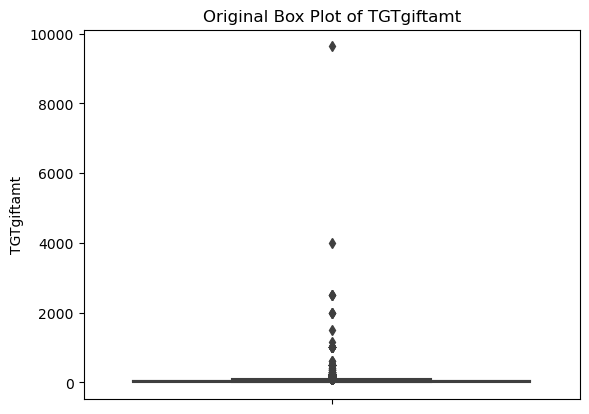

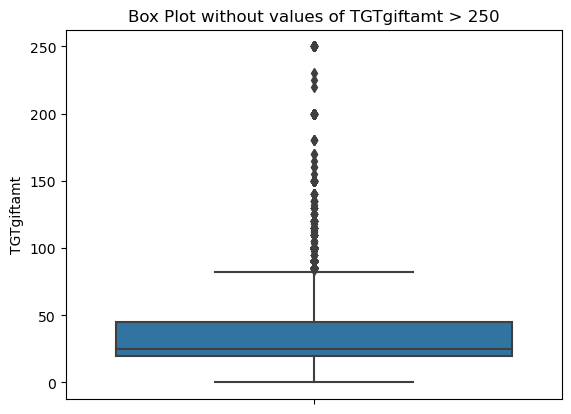

In [61]:
# viewing outliers
def removal_box_plot(df, column, threshold):
    sns.boxplot(data=df, y=column)
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
    sns.boxplot(data=removed_outliers, y=column)
    plt.title(f'Box Plot without values of {column} > 250')
    plt.show()
    return removed_outliers
 
 
threshold_value = 250

no_outliers = removal_box_plot(train_responders, 'TGTgiftamt', threshold_value)

In [62]:
# manipulating training data to use value of 250 for rows where TGTgiftamt > 250
train_responders.loc[train_responders['TGTgiftamt'] >= 250, 'TGTgiftamt'] = 250
ctr = 0
for index, row in train_responders.iterrows():
    if row["TGTgiftamt"] == 250:
        ctr += 1
print(ctr)

132


In [63]:
# checking random forest model for phase 2 feature selection
rfkbest = make_pipeline(SelectKBest(k=20), RandomForestRegressor(random_state=12345))
rfkbest.fit(train_responders[feature_sel], train_responders[y_name])

/Users/kylieloudermilk/Desktop/DNSC_6317/Project/venv/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [80 91 97] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/kylieloudermilk/Desktop/DNSC_6317/Project/venv/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Pipeline(steps=[('selectkbest', SelectKBest(k=20)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=12345))])

In [64]:
rfkbest[:-1].get_feature_names_out()

array(['append_animal_welfare', 'append_religion', 'append_cure',
       'append_guardian_angles', 'append_wildlifewarriors',
       'append_fundraisingpartners', 'append_direct_trans',
       'append_trans_life', 'append_env_enthusiasts', 'append_NetWorth',
       'append_WealthResources', 'append_mt_CultureArtsEvents',
       'append_mt_HighDollarDonor', 'GivingYears', 'cumul_amount',
       'first_gift_amount', 'HPG_amount', 'MRG_amount', 'avg_gift_amt',
       'Gift_Behavior_A: All'], dtype=object)

In [65]:
# checking gradient boost model for phase 2 feature selection
hgkbest = make_pipeline(SelectKBest(k=20), HistGradientBoostingRegressor(random_state=12345))
hgkbest.fit(train_responders[feature_sel], train_responders[y_name])

/Users/kylieloudermilk/Desktop/DNSC_6317/Project/venv/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [80 91 97] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/kylieloudermilk/Desktop/DNSC_6317/Project/venv/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Pipeline(steps=[('selectkbest', SelectKBest(k=20)),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(random_state=12345))])

In [66]:
hgkbest[:-1].get_feature_names_out()

array(['append_animal_welfare', 'append_religion', 'append_cure',
       'append_guardian_angles', 'append_wildlifewarriors',
       'append_fundraisingpartners', 'append_direct_trans',
       'append_trans_life', 'append_env_enthusiasts', 'append_NetWorth',
       'append_WealthResources', 'append_mt_CultureArtsEvents',
       'append_mt_HighDollarDonor', 'GivingYears', 'cumul_amount',
       'first_gift_amount', 'HPG_amount', 'MRG_amount', 'avg_gift_amt',
       'Gift_Behavior_A: All'], dtype=object)

In [67]:
# temp selected features
x_names_2 = ['append_animal_welfare', 'append_religion', 'append_cure',
       'append_guardian_angles', 'append_wildlifewarriors',
       'append_fundraisingpartners', 'append_direct_trans',
       'append_trans_life', 'append_env_enthusiasts', 'append_NetWorth',
       'append_WealthResources', 'append_mt_CultureArtsEvents',
       'append_mt_HighDollarDonor', 'GivingYears', 'cumul_amount',
       'first_gift_amount', 'HPG_amount', 'MRG_amount', 'avg_gift_amt',
       'Gift_Behavior_A: All']


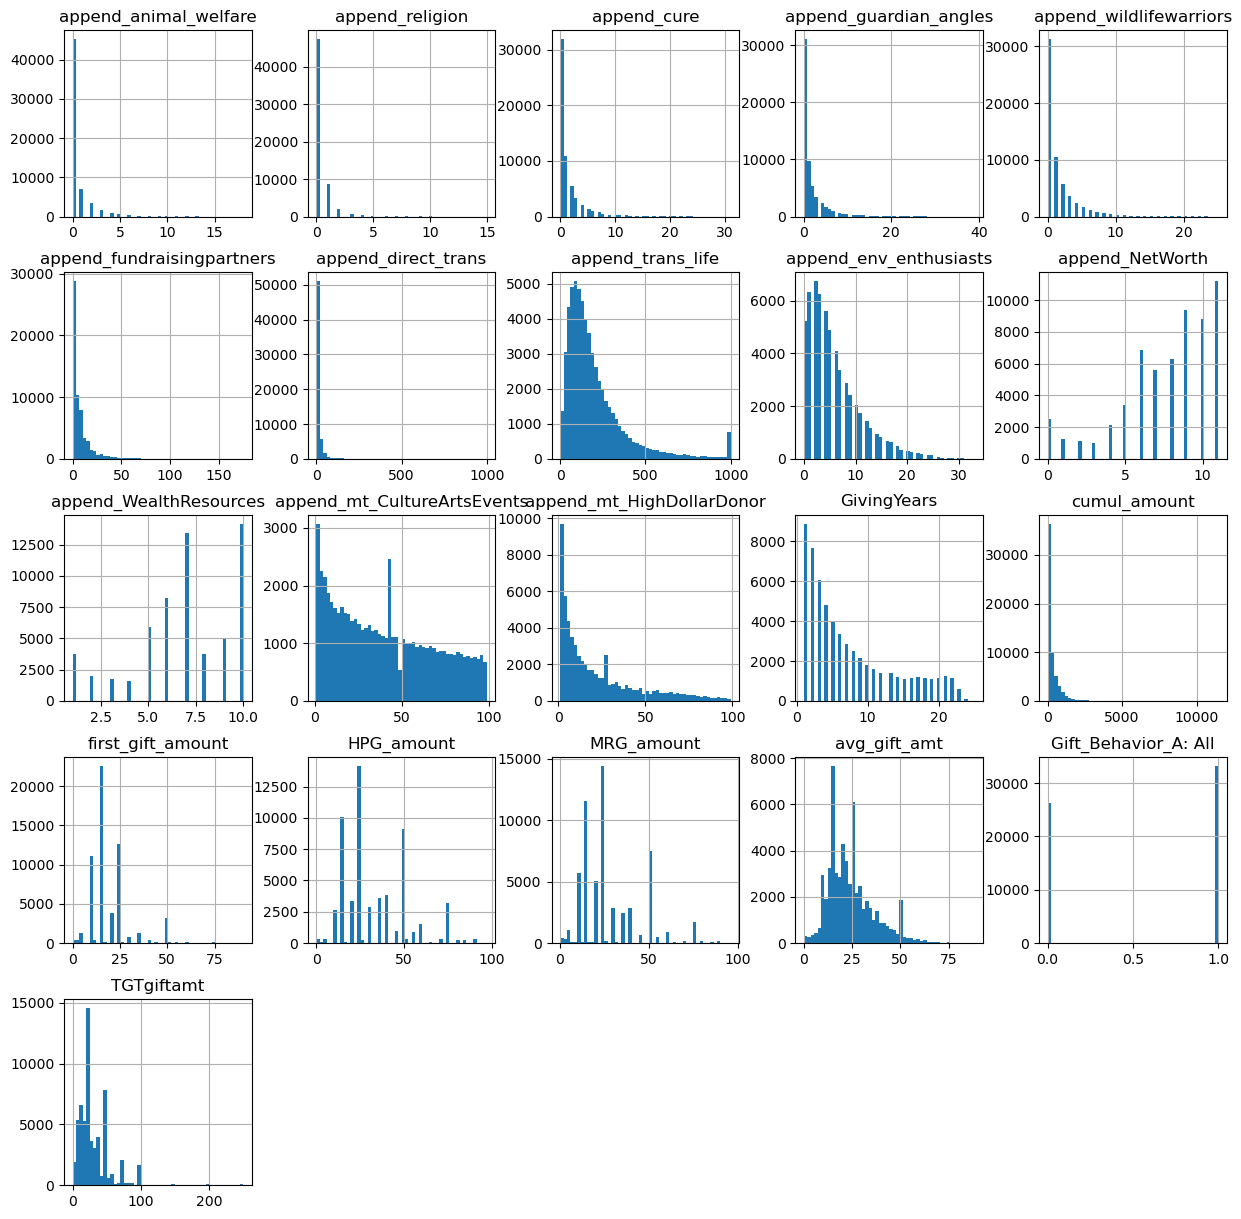

In [68]:
# viewing distributions and correlations of potential x features for feature selection
_ = train_responders[x_names_2 + ['TGTgiftamt']].hist(bins=50, figsize=(15, 15))

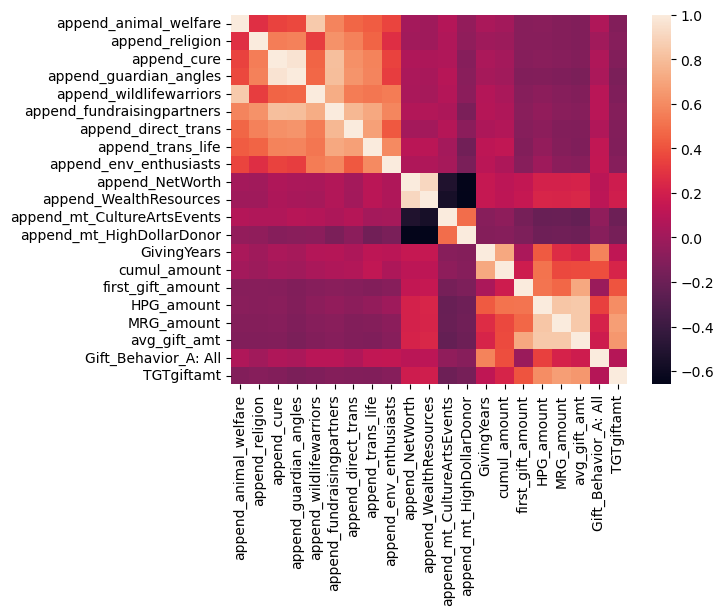

In [69]:
corr = train_responders[x_names_2 + ['TGTgiftamt']].corr()
_ = sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

### Phase 2 Models

In [70]:
# final selected features
x_names_2 = ['append_cure', 'append_guardian_angles', 'append_wildlifewarriors',
       'append_fundraisingpartners', 'append_trans_life', 'append_env_enthusiasts', 
       'append_NetWorth', 'append_mt_CultureArtsEvents', 'append_mt_HighDollarDonor', 
       'GivingYears', 'first_gift_amount', 'HPG_amount', 'MRG_amount', 'avg_gift_amt']

In [71]:
import joblib

N_CORES = joblib.cpu_count(only_physical_cores=True)
print(f"Number of physical cores: {N_CORES}")

Number of physical cores: 11


In [ ]:
# dictionary of hyperparameter value lists for grid search

'''model_params = {'max_iter': np.arange(10,300,50),
               'max_depth': np.arange(1,100,10),
               'min_samples_leaf': np.arange(10,40,1),
               'learning_rate': np.arange(0.1,1,.1)}

# Decision Tree Regressor grid search
best_model = model_grid(train_responders, test_responders, x_names_2, y_name, HistGradientBoostingRegressor, model_params=model_params, n_models=200, 
                    seed=SEED)'''

In [ ]:
# print(best_model)

In [72]:
m = train_responders[x_names].masterprimaryid.count()

In [73]:
rf = RandomForestRegressor(random_state=12345, n_jobs=N_CORES, max_features=m)
rf.fit(train_responders[x_names_2], train_responders[y_name])

RandomForestRegressor(max_features=59494, n_jobs=11, random_state=12345)

In [74]:
hg = HistGradientBoostingRegressor(learning_rate=0.9, max_depth=91, max_iter=60,
                              min_samples_leaf=15, random_state=12345)
hg.fit(train_responders[x_names_2], train_responders[y_name])

HistGradientBoostingRegressor(learning_rate=0.9, max_depth=91, max_iter=60,
                              min_samples_leaf=15, random_state=12345)

<BarContainer object of 14 artists>

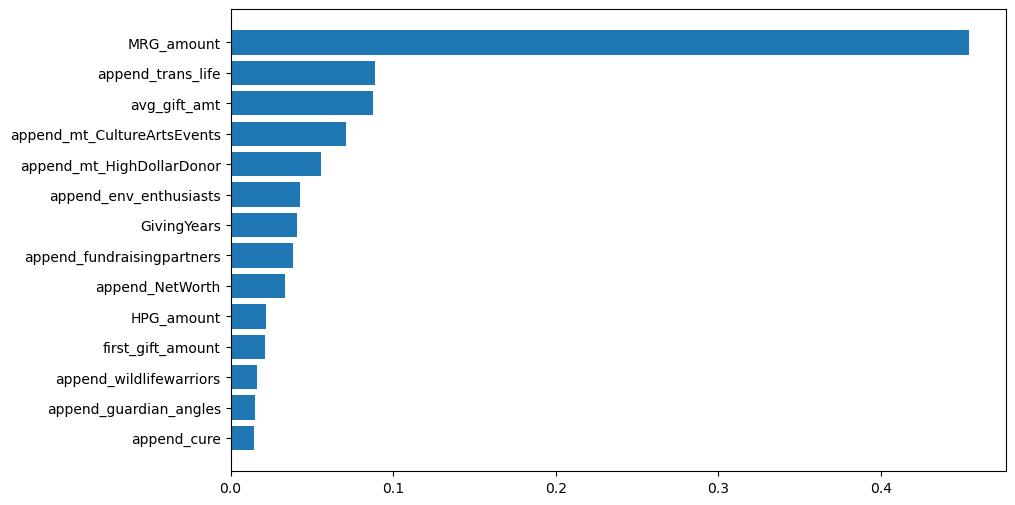

In [75]:
# feature importance
fi_df = pd.DataFrame()
fi_df['feature_importance'] = rf.feature_importances_
fi_df['feature'] = rf.feature_names_in_
fi_df.sort_values(by='feature_importance', inplace=True)
plt.figure(figsize=(10,6))
plt.barh('feature', 'feature_importance', data=fi_df)

In [79]:
# prediction MAE and MSE for Random Forest
rf_test_ypred = rf.predict(test_responders[x_names_2])
rf_mae_test_ypred = round(mean_absolute_error(test_responders[y_name], rf_test_ypred),3)
print("Random Forest MAE: ", rf_mae_test_ypred)
rf_mse_test_ypred = round(mean_squared_error(test_responders[y_name], rf_test_ypred),3)
print("Random Forest MSE: ", rf_mse_test_ypred)
print("Random Forest y predictions mean for test data: ", rf_test_ypred.mean())

Random Forest MAE:  10.253
Random Forest MSE:  1738.943
Random Forest y predictions mean for test data:  34.128665912809176


In [80]:
# prediction MAE and MSE for Gradient Boosting
hg_test_ypred = hg.predict(test_responders[x_names_2])
hg_mae_test_ypred = round(mean_absolute_error(test_responders[y_name], hg_test_ypred),3)
print("HGB MAE: ", hg_mae_test_ypred)
hg_mse_test_ypred = round(mean_squared_error(test_responders[y_name], hg_test_ypred),3)
print("HGB MSE: ", hg_mse_test_ypred)
print("HBG y predictions mean for test data: ", hg_test_ypred.mean())

HGB MAE:  10.206
HGB MSE:  1752.763
HBG y predictions mean for test data:  33.32434086674013


In [81]:
# transformed target regressor - Random Forest
trans_rf = TransformedTargetRegressor(regressor=rf, transformer=QuantileTransformer(output_distribution='normal'))
trans_rf.fit(train_responders[x_names_2], train_responders[y_name])
rf_trans_yhat = trans_rf.predict(test_responders[x_names_2])
print("Random Forest Transformed test data Regressor MAE: ",round(mean_absolute_error(test_responders[y_name], rf_trans_yhat), 2))
print("Random Forest Transformed test data Regressor MSE: ",round(np.sqrt(mean_squared_error(test_responders[y_name], rf_trans_yhat)),2))

Random Forest Transformed test data Regressor MAE:  9.22
Random Forest Transformed test data Regressor MSE:  41.83


In [82]:
# transformed target regressor - Decision Tree
trans_hg = TransformedTargetRegressor(regressor=hg, transformer=QuantileTransformer(output_distribution='normal'))
trans_hg.fit(train_responders[x_names_2], train_responders[y_name])
hg_trans_yhat = trans_hg.predict(test_responders[x_names_2])
print("Hist Gradient Boosting Regressor test data MAE: ",round(mean_absolute_error(test_responders[y_name], hg_trans_yhat), 2))
print("Hist Gradient Boosting Transformed Regressor test data MSE: ",round(np.sqrt(mean_squared_error(test_responders[y_name], hg_trans_yhat)),2))

Hist Gradient Boosting Regressor test data MAE:  9.22
Hist Gradient Boosting Transformed Regressor test data MSE:  42.06


In [83]:
# storing random forest predictions in dataframe for visualization
df = pd.DataFrame(train_responders[[y_name, 'masterprimaryid']])
df['pred'] = trans_rf.predict(train_responders[x_names_2])
df.loc[df['pred'] < 0.0, 'pred'] = 0.0
df

,TGTgiftamt,masterprimaryid,pred
25402,10.0,01F8E8D4-9536-4D49-9AE8-BB2445194318,10.0
825957,15.0,4053FDC1-BE13-41B5-B3B6-1C7F6F2B8B75,20.0
1246024,25.0,6116D0CE-1065-4706-8155-0B74FF3C3669,25.0
32457,40.0,02861F4F-A448-417D-85E8-1F1A734DE9BF,45.0
2825358,35.0,DCB0C105-3AFD-4D86-BC4C-E3FE55937B9C,30.0
...,...,...,...
3152203,20.0,F643A3AC-7922-4289-A6C8-3BC5E2B6BF93,20.0
2929133,20.0,E4D52FB5-7AC6-4F0B-AEA0-1C3ACC17DBF1,25.0
1501988,20.0,751DF106-B4C4-499F-A36F-967DFE3A311E,20.0
720725,25.0,38205B0A-3894-4BB8-917D-69859F646886,25.0


(0.0, 250.0)

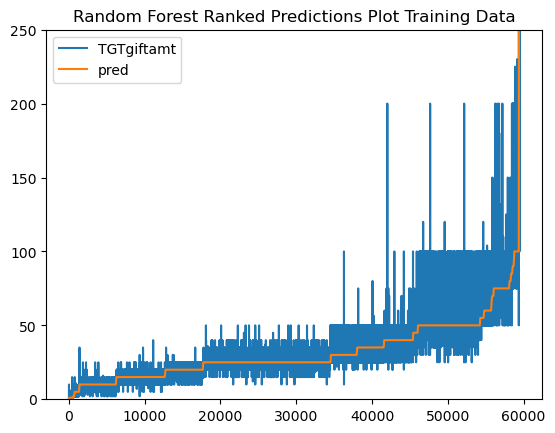

In [84]:
# visualizing performance of random forest
df.sort_values(by='pred', inplace=True)
df.reset_index(inplace=True, drop=True)
df.plot(title='Random Forest Ranked Predictions Plot Training Data')
plt.ylim((0,250))

<Axes: title={'center': 'Random Forest Actual vs. Predictions'}, xlabel='TGTgiftamt', ylabel='pred'>

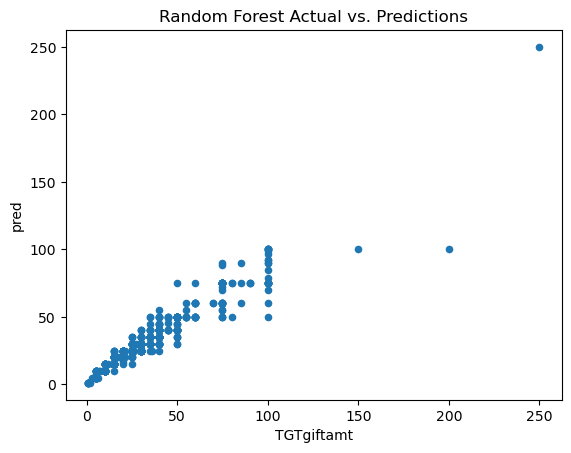

In [85]:
# visualizing random forest predictions vs actual y values
df.sample(n=1000, random_state=12345).plot(kind='scatter', x='TGTgiftamt', y='pred', title='Random Forest Actual vs. Predictions')

In [86]:
# storing decision tree predictions in dataframe for visualization
df2 = pd.DataFrame(train_responders[[y_name, 'masterprimaryid']])
df2['pred'] = trans_hg.predict(train_responders[x_names_2])
df2.loc[df2['pred'] < 0.0, 'pred'] = 0.0
df2

,TGTgiftamt,masterprimaryid,pred
25402,10.0,01F8E8D4-9536-4D49-9AE8-BB2445194318,10.0
825957,15.0,4053FDC1-BE13-41B5-B3B6-1C7F6F2B8B75,20.0
1246024,25.0,6116D0CE-1065-4706-8155-0B74FF3C3669,30.0
32457,40.0,02861F4F-A448-417D-85E8-1F1A734DE9BF,45.0
2825358,35.0,DCB0C105-3AFD-4D86-BC4C-E3FE55937B9C,30.0
...,...,...,...
3152203,20.0,F643A3AC-7922-4289-A6C8-3BC5E2B6BF93,25.0
2929133,20.0,E4D52FB5-7AC6-4F0B-AEA0-1C3ACC17DBF1,20.0
1501988,20.0,751DF106-B4C4-499F-A36F-967DFE3A311E,15.0
720725,25.0,38205B0A-3894-4BB8-917D-69859F646886,40.0


(0.0, 250.0)

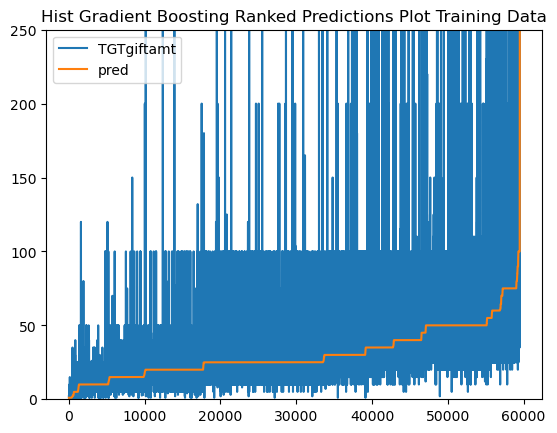

In [87]:
# visualizing performance of decision tree
df2.sort_values(by='pred', inplace=True)
df2.reset_index(inplace=True, drop=True)
df2.plot(title='Hist Gradient Boosting Ranked Predictions Plot Training Data')
plt.ylim((0,250))

<Axes: title={'center': 'Hist Gradient Boosting Actual vs. Predictions'}, xlabel='TGTgiftamt', ylabel='pred'>

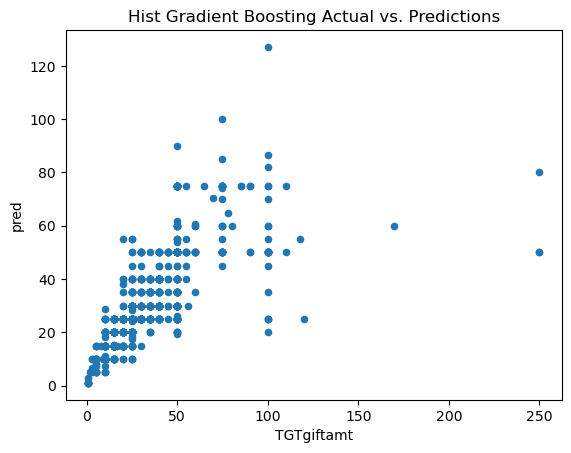

In [88]:
# visualizing Hist Gradient Boosting predictions vs actual y values
df2.sample(n=1000, random_state=12345).plot(kind='scatter', x='TGTgiftamt', y='pred', title='Hist Gradient Boosting Actual vs. Predictions')

In [89]:
# shortcut names
rf_yhat_name = 'phat_rf'
rf_r_name = 'r_rf'

# calculate predictions for transformed random forest
rf_rem_phat = pd.DataFrame(trans_rf.predict(test_responders[x_names_2]), columns=['phat_rf'])
rf_rem_phat = pd.concat([test_responders[x_names_2].reset_index(drop=True),test_responders[y_name].reset_index(drop=True), rf_rem_phat], axis=1)
# calculate residuals
rf_rem_phat[rf_r_name] = rf_rem_phat[y_name] - rf_rem_phat[rf_yhat_name]

In [90]:
rf_rem_phat.sort_values(by='r_rf', ascending=False).head()

,append_cure,append_guardian_angles,append_wildlifewarriors,append_fundraisingpartners,append_trans_life,append_env_enthusiasts,append_NetWorth,append_mt_CultureArtsEvents,append_mt_HighDollarDonor,GivingYears,first_gift_amount,HPG_amount,MRG_amount,avg_gift_amt,TGTgiftamt,phat_rf,r_rf
11000,0,0,0,0,124,2,8,33.000000,5.000000,20,20.0,50.0,50.0,34.090909,5000.0,50.0,4950.0
16764,0,0,0,0,57,0,9,22.000000,15.000000,8,25.0,55.0,15.0,31.428571,1500.0,25.0,1475.0
16606,4,3,5,22,414,14,11,53.000000,1.000000,23,10.0,50.0,50.0,26.603175,1500.0,250.0,1250.0
19806,0,0,0,5,245,2,11,5.000000,6.000000,2,15.0,15.0,15.0,15.000000,1000.0,20.0,980.0
15069,1,1,0,2,169,2,8,42.454371,26.562363,9,60.0,60.0,15.0,41.538462,1000.0,25.0,975.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


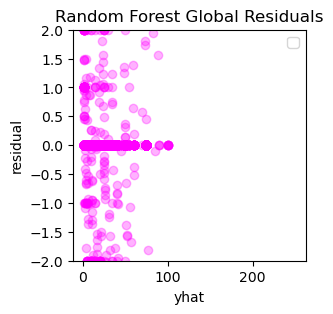

In [91]:
# initialize figure
fig, ax_ = plt.subplots(figsize=(3, 3))

# plot groups with appropriate color
color_list = ['royalblue', 'magenta']
c_idx = 0

ax_.plot(rf_rem_phat[rf_yhat_name], rf_rem_phat[rf_r_name],
             marker='o', linestyle='', color=color_list[1], alpha=0.3)
plt.ylim((-2,2))
# annotate plot
_ = plt.xlabel('yhat')
_ = plt.ylabel('residual')
_ = ax_.legend(loc=1)
_ = plt.title('Random Forest Global Residuals')

In [92]:
# shortcut names
hg_yhat_name = 'phat_hg'
hg_r_name = 'r_hg'

# calculate predictions for Hist Gradient Boosting
hg_rem_phat = pd.DataFrame(trans_hg.predict(test_responders[x_names_2]), columns=['phat_hg'])
hg_rem_phat = pd.concat([test_responders[x_names_2].reset_index(drop=True),test_responders[y_name].reset_index(drop=True), hg_rem_phat], axis=1)
# calculate residuals
hg_rem_phat[hg_r_name] = hg_rem_phat[y_name] - hg_rem_phat[hg_yhat_name]

In [93]:
hg_rem_phat.sort_values(by='r_hg', ascending=False).tail()

,append_cure,append_guardian_angles,append_wildlifewarriors,append_fundraisingpartners,append_trans_life,append_env_enthusiasts,append_NetWorth,append_mt_CultureArtsEvents,append_mt_HighDollarDonor,GivingYears,first_gift_amount,HPG_amount,MRG_amount,avg_gift_amt,TGTgiftamt,phat_hg,r_hg
19661,1,0,2,10,175,9,9,20.0,24.0,21,10.0,85.0,75.0,43.184211,10.0,75.000000,-65.000000
20451,0,0,1,9,217,5,11,8.0,1.0,15,50.0,75.0,50.0,17.985075,50.0,118.916479,-68.916479
23342,2,3,0,7,271,2,9,51.0,4.0,1,50.0,50.0,50.0,50.000000,25.0,100.000000,-75.000000
1147,0,0,0,2,129,7,9,5.0,21.0,11,25.0,90.0,90.0,68.684211,25.0,100.000000,-75.000000
1103,0,0,1,3,202,2,11,7.0,5.0,13,25.0,75.0,15.0,17.928571,30.0,242.861182,-212.861182


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


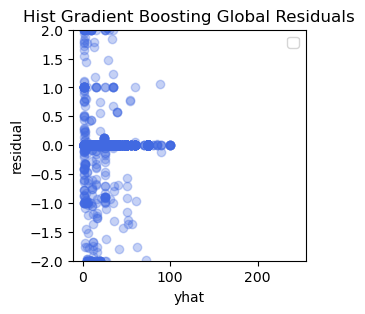

In [94]:
# initialize figure
fig, ax_ = plt.subplots(figsize=(3, 3))

# plot groups with appropriate color
color_list = ['royalblue', 'magenta']
c_idx = 0

ax_.plot(hg_rem_phat[hg_yhat_name], hg_rem_phat[hg_r_name],
             marker='o', linestyle='', color=color_list[0], alpha=0.3)
plt.ylim((-2,2))
# annotate plot
_ = plt.xlabel('yhat')
_ = plt.ylabel('residual')
_ = ax_.legend(loc=1)
_ = plt.title('Hist Gradient Boosting Global Residuals')

In [95]:
# remove rows with biggest outliers for re-training
n_remove = 20
rf_rem_data = rf_rem_phat.copy(deep=True)
rf_rem_data.drop(list(rf_rem_phat.sort_values(by='r_rf', ascending=False).head(n=n_remove).index), axis=0, inplace=True)

In [96]:
np.random.seed(SEED) # preserve exact reproducibility for this cell

# execute split
split = np.random.rand(len(rf_rem_data)) < split_ratio
rf_rem_train = rf_rem_data[split]
rf_rem_valid = rf_rem_data[~split]

# summarize split
print('Random Forest remediated train data rows = %d, columns = %d' % (rf_rem_train.shape[0], rf_rem_train.shape[1]))
print('Random Forest remediated validation data rows = %d, columns = %d' % (rf_rem_valid.shape[0], rf_rem_valid.shape[1]))

# retrain
rf_2 = trans_rf.fit(rf_rem_train[x_names_2], rf_rem_train[y_name])
rf_rem_ypred = rf_2.predict(rf_rem_valid[x_names_2])
rf_rem_mae_pred = round(mean_absolute_error(rf_rem_valid[y_name], rf_rem_ypred),3)
print('Random Forest Remediated under-sampled MAE: %.4f.' % rf_rem_mae_pred)

Random Forest remediated train data rows = 17691, columns = 17
Random Forest remediated validation data rows = 7726, columns = 17
Random Forest Remediated under-sampled MAE: 8.9060.


In [97]:
# remove rows with biggest outliers for re-training
n_remove = 20
hg_rem_data = hg_rem_phat.copy(deep=True)
hg_rem_data.drop(list(hg_rem_phat.sort_values(by='r_hg', ascending=False).head(n=n_remove).index), axis=0, inplace=True)

In [98]:
np.random.seed(SEED) # preserve exact reproducibility for this cell

# execute split
split = np.random.rand(len(hg_rem_data)) < split_ratio
hg_rem_train = hg_rem_data[split]
hg_rem_valid = hg_rem_data[~split]

# summarize split
print('Hist Gradient Boosting remediated train data rows = %d, columns = %d' % (hg_rem_train.shape[0], hg_rem_train.shape[1]))
print('Hist Gradient Boosting remediated validation data rows = %d, columns = %d' % (hg_rem_valid.shape[0], hg_rem_valid.shape[1]))

# retrain
hg_2 = trans_hg
hg_2.fit(hg_rem_train[x_names_2], hg_rem_train[y_name])
hg_trans_yhat = trans_hg.predict(test_responders[x_names_2])
hg_rem_ypred = hg_2.predict(hg_rem_valid[x_names_2])
hg_rem_mae_pred = round(mean_absolute_error(hg_rem_valid[y_name], hg_rem_ypred),3)
print('Hist Gradient Boosting Remediated under-sampled MAE: %.4f.' % hg_rem_mae_pred)

Hist Gradient Boosting remediated train data rows = 17691, columns = 17
Hist Gradient Boosting remediated validation data rows = 7726, columns = 17
Hist Gradient Boosting Remediated under-sampled MAE: 9.0720.


In [99]:
ypred_test_og = rf.predict(valid[x_names_2])
round(mean_absolute_error(valid[y_name], ypred_test_og),3)

32.878

In [100]:
ypred_test = rf_2.predict(valid[x_names_2])

In [101]:
round(mean_absolute_error(valid[y_name], ypred_test),3)

29.396

In [102]:
ypred_test2_og = hg.predict(valid[x_names_2])
round(mean_absolute_error(valid[y_name], ypred_test2_og),3)

31.755

In [103]:
ypred_test2 = hg_2.predict(valid[x_names_2])

In [104]:
round(mean_absolute_error(valid[y_name], ypred_test2),3)

29.164

### Average Phase 2 Model Results

In [105]:
result2 = pd.DataFrame(valid[['masterprimaryid', 'TGTgiftamt']])
result2['pred1'] = ypred_test
result2.loc[result2['pred1'] < 0.0, 'pred1'] = 0.0
result2

,masterprimaryid,TGTgiftamt,pred1
0,000004E1-D14E-42AB-A384-40A2773F507C,0.0,10.0
2170174,A975C953-4176-434D-A83C-B14D5D07B84B,0.0,25.0
2170176,A975CEE6-6CED-450C-BED9-661BB8C4D26C,0.0,25.0
2170168,A975B22B-C65C-410C-AA80-E8BBC75BD95B,0.0,50.0
2170178,A975CEE6-6CED-450C-BED9-661BB8C4D26C,0.0,25.0
...,...,...,...
1946687,97EC8486-DF04-406A-9952-75088708681C,40.0,25.0
933027,48A82A80-4E73-493D-A444-F534B100F080,25.0,25.0
121182,095F2C13-F9E4-4367-A52F-3BF54199F84A,25.0,25.0
1118801,5717690C-0BD7-4B0C-97F4-3A2AB504BDC7,100.0,75.0


In [106]:
tree2df = pd.DataFrame(valid['TGTgiftamt'])
tree2df['pred2'] = ypred_test2
tree2df.loc[tree2df['pred2'] < 0.0, 'pred2'] = 0.0
tree2df

,TGTgiftamt,pred2
0,0.0,15.0
2170174,0.0,25.0
2170176,0.0,20.0
2170168,0.0,50.0
2170178,0.0,20.0
...,...,...
1946687,40.0,25.0
933027,25.0,25.0
121182,25.0,20.0
1118801,100.0,50.0


In [107]:
result2['pred'] = ((result2['pred1'] + tree2df['pred2']) / 2)
result2 = result2.drop(columns=['pred1'])
result2

,masterprimaryid,TGTgiftamt,pred
0,000004E1-D14E-42AB-A384-40A2773F507C,0.0,12.5
2170174,A975C953-4176-434D-A83C-B14D5D07B84B,0.0,25.0
2170176,A975CEE6-6CED-450C-BED9-661BB8C4D26C,0.0,22.5
2170168,A975B22B-C65C-410C-AA80-E8BBC75BD95B,0.0,50.0
2170178,A975CEE6-6CED-450C-BED9-661BB8C4D26C,0.0,22.5
...,...,...,...
1946687,97EC8486-DF04-406A-9952-75088708681C,40.0,25.0
933027,48A82A80-4E73-493D-A444-F534B100F080,25.0,25.0
121182,095F2C13-F9E4-4367-A52F-3BF54199F84A,25.0,22.5
1118801,5717690C-0BD7-4B0C-97F4-3A2AB504BDC7,100.0,62.5


(0.0, 250.0)

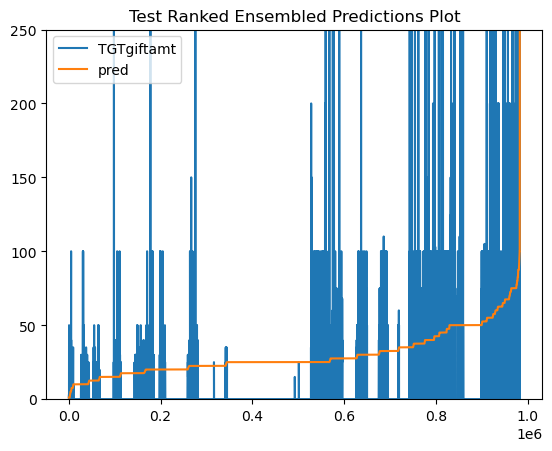

In [108]:
graph_result2 = result2.copy(deep=True)
graph_result2.sort_values(by='pred', inplace=True)
graph_result2.reset_index(inplace=True, drop=True)
graph_result2.plot(title='Test Ranked Ensembled Predictions Plot')
plt.ylim(0, 250)

(0.0, 250.0)

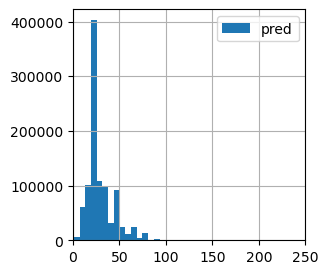

In [109]:
_ = graph_result2['pred'].hist(bins=50, figsize=(3, 3), legend='pred')
plt.xlim(0, 250)

(0.0, 250.0)

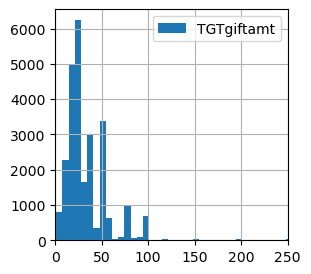

In [110]:
_ = test_responders['TGTgiftamt'].hist(bins=750, figsize=(3, 3), legend='TGTgiftamt')
plt.xlim(0, 250)

In [111]:
print("Final MAE: ", round(mean_absolute_error(result2['TGTgiftamt'], result2['pred']),3))

Final MAE:  29.278


### Results

In [112]:
result1

,masterprimaryid,TGTresp,pred,TGT_pred
0,000004E1-D14E-42AB-A384-40A2773F507C,0,0.074490,0
2170174,A975C953-4176-434D-A83C-B14D5D07B84B,0,0.028935,0
2170176,A975CEE6-6CED-450C-BED9-661BB8C4D26C,0,0.091403,0
2170168,A975B22B-C65C-410C-AA80-E8BBC75BD95B,0,0.120197,0
2170178,A975CEE6-6CED-450C-BED9-661BB8C4D26C,0,0.075866,0
...,...,...,...,...
1946687,97EC8486-DF04-406A-9952-75088708681C,1,0.078911,0
933027,48A82A80-4E73-493D-A444-F534B100F080,1,0.454796,0
121182,095F2C13-F9E4-4367-A52F-3BF54199F84A,1,0.166619,0
1118801,5717690C-0BD7-4B0C-97F4-3A2AB504BDC7,1,0.160619,0


In [113]:
result2

,masterprimaryid,TGTgiftamt,pred
0,000004E1-D14E-42AB-A384-40A2773F507C,0.0,12.5
2170174,A975C953-4176-434D-A83C-B14D5D07B84B,0.0,25.0
2170176,A975CEE6-6CED-450C-BED9-661BB8C4D26C,0.0,22.5
2170168,A975B22B-C65C-410C-AA80-E8BBC75BD95B,0.0,50.0
2170178,A975CEE6-6CED-450C-BED9-661BB8C4D26C,0.0,22.5
...,...,...,...
1946687,97EC8486-DF04-406A-9952-75088708681C,40.0,25.0
933027,48A82A80-4E73-493D-A444-F534B100F080,25.0,25.0
121182,095F2C13-F9E4-4367-A52F-3BF54199F84A,25.0,22.5
1118801,5717690C-0BD7-4B0C-97F4-3A2AB504BDC7,100.0,62.5


In [114]:
# merge results from phase 1 and 2
final = result1.merge(result2, left_index=True, right_index=True)

In [115]:
# ensure no nulls and calculate final score
final['pred_y'].fillna(0.0, inplace=True)
final['final_score'] = final['pred_x']*final['pred_y']
#result1['TGTgiftamt'] = result2['TGTgiftamt']


(0.0, 50000.0)

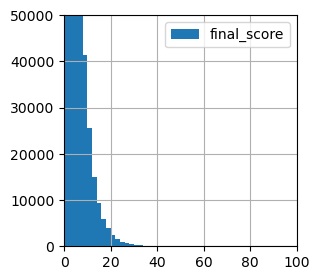

In [116]:
_ = final['final_score'].hist(bins=50, figsize=(3, 3), legend='final score')
plt.xlim(0, 100)
plt.ylim(0, 50000)

In [117]:
max(final['final_score'])

100.01847338364854

In [118]:
min(final['final_score'])

0.003100522620053742

In [119]:
final['final_score'].mean()

3.7068566562641303

In [120]:
# sort output by final score, then by phase 1 prediction
# drop values not needed in final output
final.sort_values(by=['final_score', 'pred_x'], inplace=True, ascending=True)
final = final.drop(columns=['TGTgiftamt', 'TGT_pred', 'masterprimaryid_y'])

In [121]:
# rank by final score to prep for decile anlaysis
final['rank'] = final['final_score'].rank(method='first')

In [122]:
# drop duplicates by masterprimaryid (keep the highest ranked)
final = final.drop_duplicates(subset='masterprimaryid_x', keep='first')
final

,masterprimaryid_x,TGTresp,pred_x,pred_y,final_score,rank
1820716,8DFFD6AC-398C-4D37-9D32-1C9FF13B81D4,0,0.000131,23.720175,0.003101,1.0
1487648,73FBB354-7F66-4A0B-9015-4B837FDAB53E,0,0.000125,25.000000,0.003130,2.0
477305,25459685-816C-4EBF-AAA0-5FA01C3A9105,0,0.000131,27.500000,0.003595,3.0
2862278,DF90D573-23E7-4A7F-BA3B-C218BDCBF613,0,0.000131,30.000000,0.003921,4.0
1172485,5B3E9F83-AD0F-4295-8B69-601EB08E4494,0,0.000235,25.000000,0.005865,5.0
...,...,...,...,...,...,...
1597008,7C81D94D-339A-4794-8052-6272AC5AE54F,1,0.513896,100.000000,51.389556,983097.0
2343529,B7122D58-F97B-467E-8A04-C07779229B87,0,0.189767,279.993175,53.133419,983099.0
1540046,78119EBC-9254-4492-ACE2-1ED0EB6CC3DC,1,0.609680,87.500000,53.347011,983101.0
2475802,C16F8D46-1BCA-44BF-A65E-9FAF6E8783F3,0,0.738927,75.000000,55.419520,983102.0


In [123]:
# create deciles
final['decile'] = pd.qcut(final['rank'].values, 10).codes

In [124]:
final['final_score'].describe()

count    629380.000000
mean          3.264305
std           3.430959
min           0.003101
25%           1.114043
50%           2.075264
75%           4.173921
max         100.018473
Name: final_score, dtype: float64

In [125]:
final

,masterprimaryid_x,TGTresp,pred_x,pred_y,final_score,rank,decile
1820716,8DFFD6AC-398C-4D37-9D32-1C9FF13B81D4,0,0.000131,23.720175,0.003101,1.0,0
1487648,73FBB354-7F66-4A0B-9015-4B837FDAB53E,0,0.000125,25.000000,0.003130,2.0,0
477305,25459685-816C-4EBF-AAA0-5FA01C3A9105,0,0.000131,27.500000,0.003595,3.0,0
2862278,DF90D573-23E7-4A7F-BA3B-C218BDCBF613,0,0.000131,30.000000,0.003921,4.0,0
1172485,5B3E9F83-AD0F-4295-8B69-601EB08E4494,0,0.000235,25.000000,0.005865,5.0,0
...,...,...,...,...,...,...,...
1597008,7C81D94D-339A-4794-8052-6272AC5AE54F,1,0.513896,100.000000,51.389556,983097.0,9
2343529,B7122D58-F97B-467E-8A04-C07779229B87,0,0.189767,279.993175,53.133419,983099.0,9
1540046,78119EBC-9254-4492-ACE2-1ED0EB6CC3DC,1,0.609680,87.500000,53.347011,983101.0,9
2475802,C16F8D46-1BCA-44BF-A65E-9FAF6E8783F3,0,0.738927,75.000000,55.419520,983102.0,9


In [126]:
dec_groups = final.groupby(['decile']).count()
dec_groups

,masterprimaryid_x,TGTresp,pred_x,pred_y,final_score,rank
decile,,,,,,
0,62938,62938,62938,62938,62938,62938
1,62938,62938,62938,62938,62938,62938
2,62938,62938,62938,62938,62938,62938
3,62938,62938,62938,62938,62938,62938
4,62938,62938,62938,62938,62938,62938
5,62938,62938,62938,62938,62938,62938
6,62938,62938,62938,62938,62938,62938
7,62938,62938,62938,62938,62938,62938
8,62938,62938,62938,62938,62938,62938


In [127]:
# determine how many 1s are in final data
resp_groups = final.groupby(['TGTresp']).count()
resp_groups

,masterprimaryid_x,pred_x,pred_y,final_score,rank,decile
TGTresp,,,,,,
0,614440,614440,614440,614440,614440,614440
1,14940,14940,14940,14940,14940,14940


In [128]:
# set variable to represent number of total responders
num_responders = 14929

In [129]:
# calculate number of actual past responders in each decile
decile_counts = {}

for decile in range(0,10,1):
    count = final[(final['decile'] == decile) & (final['TGTresp'] == 1)].shape[0]
    decile_counts[decile] = count
decile_counts

{0: 340,
 1: 518,
 2: 589,
 3: 816,
 4: 1050,
 5: 1290,
 6: 1615,
 7: 2018,
 8: 2651,
 9: 4053}

In [130]:
# print out percentage of actual responders in each decile

In [131]:
(final.groupby('decile').get_group(9).groupby('TGTresp').get_group(1)['final_score'].count())/num_responders

0.2714850291379195

In [132]:
(final.groupby('decile').get_group(8).groupby('TGTresp').get_group(1)['final_score'].count())/num_responders

0.17757384955455824

In [133]:
(final.groupby('decile').get_group(7).groupby('TGTresp').get_group(1)['final_score'].count())/num_responders

0.1351731529238395

In [134]:
(final.groupby('decile').get_group(6).groupby('TGTresp').get_group(1)['final_score'].count())/num_responders

0.1081787125728448

In [135]:
(final.groupby('decile').get_group(5).groupby('TGTresp').get_group(1)['final_score'].count())/num_responders

0.0864090026123652

In [136]:
(final.groupby('decile').get_group(4).groupby('TGTresp').get_group(1)['final_score'].count())/num_responders

0.07033290910308795

In [137]:
(final.groupby('decile').get_group(3).groupby('TGTresp').get_group(1)['final_score'].count())/num_responders

0.05465871793154264

In [138]:
(final.groupby('decile').get_group(2).groupby('TGTresp').get_group(1)['final_score'].count())/num_responders

0.039453412820684576

In [139]:
(final.groupby('decile').get_group(1).groupby('TGTresp').get_group(1)['final_score'].count())/num_responders

0.03469756849085672

In [140]:
(final.groupby('decile').get_group(0).groupby('TGTresp').get_group(1)['final_score'].count())/num_responders

0.02277446580480943

In [141]:
# calculate expected profit for each decile
decile_profit = {}
profit = 0
for decile in range(9,-1,-1):
    profit += final.groupby('decile').get_group(decile)['final_score'].sum()
    profit -= (final.groupby('decile').get_group(decile)['final_score'].count()*.8)
    decile_profit[decile] = profit
decile_profit

{9: 665932.5768194919,
 8: 992995.0655935676,
 7: 1206776.5481660888,
 6: 1351050.1658981778,
 5: 1449035.188911732,
 4: 1514943.6059099415,
 3: 1556028.899921026,
 2: 1575817.4964513765,
 1: 1575495.261184535,
 0: 1550984.0564734444}

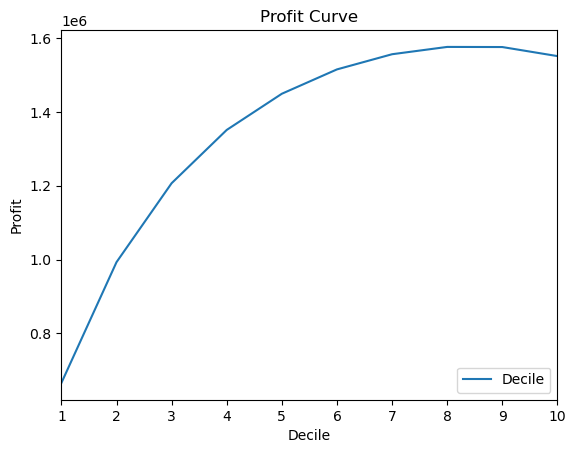

In [142]:
# Profit curve plot
plt.plot([1,2,3,4,5,6,7,8,9,10], decile_profit.values(), label = 'Decile')
plt.xlabel('Decile')
plt.ylabel('Profit')
plt.xlim(1, 10)
plt.title('Profit Curve')
plt.legend(loc='lower right')
plt.show()

# Show max profit and its threshold